# Playing with Coronaivurs Timeseries

- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset


In [1]:
# !pip install kaggle --upgrade

In [2]:
import os
from zipfile import ZipFile

## cmd = "kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge"
## os.system(cmd)

In [3]:
# !pip install kaggle --upgrade
DOWNLOAD = True

if DOWNLOAD:
    cmd = 'kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset'
    os.system(cmd)
    with ZipFile('novel-corona-virus-2019-dataset.zip') as file:
        file.extractall()

    display( os.listdir())

os.listdir()

['COVID19_open_line_list.csv',
 'time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_recovered.csv',
 '.DS_Store',
 'time_series_covid_19_deaths_US.csv',
 'covid_19_data.csv',
 'coronavirus.ipynb',
 'COVID19_line_list_data.csv',
 'README.md',
 'coronavirus-best.ipynb',
 '.gitignore',
 'time_series_covid_19_deaths.csv',
 'JMI_us_states.csv',
 'novel-corona-virus-2019-dataset.zip',
 '.gitattributes',
 '.ipynb_checkpoints',
 'novel-corona-virus-2019-dataset',
 '.git',
 'time_series_covid_19_confirmed.csv']

['COVID19_open_line_list.csv',
 'time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_recovered.csv',
 '.DS_Store',
 'time_series_covid_19_deaths_US.csv',
 'covid_19_data.csv',
 'coronavirus.ipynb',
 'COVID19_line_list_data.csv',
 'README.md',
 'coronavirus-best.ipynb',
 '.gitignore',
 'time_series_covid_19_deaths.csv',
 'JMI_us_states.csv',
 'novel-corona-virus-2019-dataset.zip',
 '.gitattributes',
 '.ipynb_checkpoints',
 'novel-corona-virus-2019-dataset',
 '.git',
 'time_series_covid_19_confirmed.csv']

## Loading Data

In [4]:
from fsds_100719.imports import *
import os,glob,sys
import re
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()


fsds_1007219  v0.7.21 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


### RESOURCES FOR FUTURE
- RAFAEL STUDY GROUP FOR MAKING A MAP
    - https://www.youtube.com/watch?v=MAhK7NHXEOg&feature=emb_logo
    - https://github.com/erdosn/additional-topic-plotly

## Time Series - Confirmed

In [5]:
# df = pd.read_csv('time_series_covid_19_confirmed.csv')
# display(df.head())
# df =pd.melt(df,id_vars=df.columns[:4],var_name='Date',value_name='Confirmed')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date',inplace=True)
# df.head()

In [6]:
# help(pd.melt)

## Main Dataset - Get US States

In [7]:
df_ = pd.read_csv('covid_19_data.csv',index_col=0)
df_

## Get only US
df_us = df_.groupby('Country/Region').get_group('US')
display(df_us.head())

## Drop columns
cols_to_drop = ['Last Update','Country/Region']
df_us = df_us.drop(cols_to_drop,axis=1)


## Make Day index 
df_us['Day'] = pd.to_datetime(df_us['ObservationDate'])
df_us.set_index('Day',inplace=True,drop=False)
df_us.drop(columns=['ObservationDate'],inplace=True)


## Chefck for ',' in 
expr = r'([A-Z]{2})'
df_us['state'] = df_us['Province/State'].apply(lambda x: re.findall(expr,x))
df_us['state'] = df_us['state'].explode()
df_us

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0


,Province/State,Confirmed,Deaths,Recovered,Day,state
Day,,,,,,
2020-01-22,Washington,1.0,0.0,0.0,2020-01-22,NaN
2020-01-23,Washington,1.0,0.0,0.0,2020-01-23,NaN
2020-01-24,Washington,1.0,0.0,0.0,2020-01-24,NaN
2020-01-24,Chicago,1.0,0.0,0.0,2020-01-24,NaN
2020-01-25,Washington,1.0,0.0,0.0,2020-01-25,NaN
...,...,...,...,...,...,...
2020-04-03,Virginia,2012.0,46.0,0.0,2020-04-03,NaN
2020-04-03,Washington,6846.0,291.0,0.0,2020-04-03,NaN
2020-04-03,West Virginia,237.0,2.0,0.0,2020-04-03,NaN


In [8]:
df_us.isna().sum().divide(len(df_us))

Province/State    0.00000
Confirmed         0.00000
Deaths            0.00000
Recovered         0.00000
Day               0.00000
state             0.63296
dtype: float64

## REPLACE STATE NAMES
https://raw.githubusercontent.com/jirvingphd/List-of-US-States/master/states.csv

In [9]:
state_url = 'https://raw.githubusercontent.com/jirvingphd/List-of-US-States/master/states.csv'
state_lookup = pd.read_csv(state_url)
state_lookup.head()

STATE_DICT = dict(zip(state_lookup['State'],state_lookup['Abbreviation']))
STATE_DICT.keys()

STATE_DICT.update({'Chicago':'IL',
                  'Puerto Rico':'Puerto Rico'})


In [10]:
df_city_states = df_us[df_us['Province/State'].str.contains(',')]
df_city_states['Province/State'].unique()

array(['Chicago, IL', 'Boston, MA', 'Los Angeles, CA', 'Orange, CA',
       'Santa Clara, CA', 'Seattle, WA', 'Tempe, AZ', 'San Benito, CA',
       'Madison, WI', 'San Diego County, CA', 'San Antonio, TX',
       'Ashland, NE', 'Travis, CA', 'Lackland, TX', 'Humboldt County, CA',
       'Sacramento County, CA', 'Omaha, NE (From Diamond Princess)',
       'Travis, CA (From Diamond Princess)',
       'Lackland, TX (From Diamond Princess)', 'Portland, OR',
       'Snohomish County, WA', 'Providence, RI', 'King County, WA',
       'Cook County, IL', 'Grafton County, NH', 'Hillsborough, FL',
       'New York City, NY', 'Placer County, CA', 'San Mateo, CA',
       'Sarasota, FL', 'Sonoma County, CA', 'Umatilla, OR',
       'Fulton County, GA', 'Washington County, OR',
       ' Norfolk County, MA', 'Berkeley, CA', 'Maricopa County, AZ',
       'Wake County, NC', 'Westchester County, NY', 'Orange County, CA',
       'Contra Costa County, CA', 'Bergen County, NJ',
       'Harris County, TX', 'S

In [11]:
df_states = df_us[~df_us['Province/State'].str.contains(',')]
df_states['state'] =  df_states['Province/State'].map(STATE_DICT)
df_states

,Province/State,Confirmed,Deaths,Recovered,Day,state
Day,,,,,,
2020-01-22,Washington,1.0,0.0,0.0,2020-01-22,WA
2020-01-23,Washington,1.0,0.0,0.0,2020-01-23,WA
2020-01-24,Washington,1.0,0.0,0.0,2020-01-24,WA
2020-01-24,Chicago,1.0,0.0,0.0,2020-01-24,IL
2020-01-25,Washington,1.0,0.0,0.0,2020-01-25,WA
...,...,...,...,...,...,...
2020-04-03,Virginia,2012.0,46.0,0.0,2020-04-03,VA
2020-04-03,Washington,6846.0,291.0,0.0,2020-04-03,WA
2020-04-03,West Virginia,237.0,2.0,0.0,2020-04-03,WV


In [12]:
df = pd.concat([df_states,df_city_states]).sort_index()
df = df.dropna(subset=['state'])
df

,Province/State,Confirmed,Deaths,Recovered,Day,state
Day,,,,,,
2020-01-22,Washington,1.0,0.0,0.0,2020-01-22,WA
2020-01-23,Washington,1.0,0.0,0.0,2020-01-23,WA
2020-01-24,Washington,1.0,0.0,0.0,2020-01-24,WA
2020-01-24,Chicago,1.0,0.0,0.0,2020-01-24,IL
2020-01-25,Washington,1.0,0.0,0.0,2020-01-25,WA
...,...,...,...,...,...,...
2020-04-03,Massachusetts,10402.0,192.0,0.0,2020-04-03,MA
2020-04-03,Michigan,12744.0,479.0,0.0,2020-04-03,MI
2020-04-03,Minnesota,788.0,22.0,0.0,2020-04-03,MN


In [13]:
df.to_csv('JMI_us_states.csv')


### def get_state_ts

In [14]:
df0 = pd.read_csv('JMI_us_states.csv',parse_dates=['Day'],index_col=0,infer_datetime_format=True)
# df.set_index('Day')
id_cols = ['Province/State','state']
df0[id_cols]

,Province/State,state
Day,,
2020-01-22,Washington,WA
2020-01-23,Washington,WA
2020-01-24,Washington,WA
2020-01-24,Chicago,IL
2020-01-25,Washington,WA
...,...,...
2020-04-03,Massachusetts,MA
2020-04-03,Michigan,MI
2020-04-03,Minnesota,MN


In [15]:
df= df0.groupby('state').resample('d').sum()
df

Confirmed  Deaths  Recovered
state Day                                     
AK    2020-03-10        0.0     0.0        0.0
      2020-03-11        0.0     0.0        0.0
      2020-03-12        0.0     0.0        0.0
      2020-03-13        1.0     0.0        0.0
      2020-03-14        0.0     0.0        0.0
...                     ...     ...        ...
WY    2020-03-30       94.0     0.0        0.0
      2020-03-31      109.0     0.0        0.0
      2020-04-01      130.0     0.0        0.0
      2020-04-02      150.0     0.0        0.0
      2020-04-03      162.0     0.0        0.0

[1712 rows x 3 columns]

In [16]:
df0.resample('d')

In [17]:
# df[id_cols] = ''#df0[id_cols]
# df
# # display(df.head())
# # print(df.index)

In [18]:
# df.set_index(['state','Day'],drop=False,inplace=True)
# df

In [19]:
def get_state_ts(df, state_name,group_col='state',ts_col=None,resample=False,agg='sum'):#, ts_col='Cases'):
    ts = df.groupby(group_col).get_group(state_name )
    # ts.set_index('date',inplace=True)
    ts = ts.reset_index().set_index('Day')
    if resample:
        ts = ts.resample('d').agg(agg)
        ts['state'] = state_name
    if ts_col is not None:
        return ts[ts_col]#.rename(f"{ts_col.name}-{state_name}")
    else:
        return ts
    
NY = get_state_ts(df,'NY',resample=True)
NY

,Confirmed,Deaths,Recovered,state
Day,,,,
2020-03-02,1.0,0.0,0.0,NY
2020-03-03,2.0,0.0,0.0,NY
2020-03-04,11.0,0.0,0.0,NY
2020-03-05,23.0,0.0,0.0,NY
2020-03-06,36.0,0.0,0.0,NY
2020-03-07,76.0,0.0,0.0,NY
2020-03-08,106.0,0.0,0.0,NY
2020-03-09,142.0,0.0,0.0,NY
2020-03-10,173.0,0.0,0.0,NY


In [20]:
print(NY.index.freq==None)

ts = NY.resample('d').sum()
ts.index

False


DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03'],
              dtype='datetime64[ns]', name='Day', freq='D')

In [21]:
def iplot_corona(df_,region='US'):
    if df_.index.freq==None:
         ts= df_.resample('d').sum()
    else:
        ts = df_.copy()

    pfig = ts.iplot(theme='solar',asFigure=True,title=f'Coronavirus in {region}',
               yTitle='# of Cumulative Cases')
    return pfig

In [22]:
def get_and_plot_state(df,state_name='NY',plot=True):
    state = get_state_ts(df,state_name)
    ts = state.resample('d').sum()
    if plot:
        pfig = iplot_corona(ts,state_name)
        display(pfig)
    return ts#pfig

test = get_and_plot_state(df,state_name='NY')
test

,Confirmed,Deaths,Recovered
Day,,,
2020-03-02,1.0,0.0,0.0
2020-03-03,2.0,0.0,0.0
2020-03-04,11.0,0.0,0.0
2020-03-05,23.0,0.0,0.0
2020-03-06,36.0,0.0,0.0
2020-03-07,76.0,0.0,0.0
2020-03-08,106.0,0.0,0.0
2020-03-09,142.0,0.0,0.0
2020-03-10,173.0,0.0,0.0


In [23]:
def plot_states(df, state_list =['NY','MD','CA'], plot_col = 'confirmed'):
    columns=[f"{state}-{plot_col}" for state in state_list]
    df_plot = pd.DataFrame()
    for state in state_list:
        ts = get_and_plot_state(df,state_name=state,plot=True)
#         ts.name = f"{state}-{plot_col}"
        df_plot = pd.concat([df_plot,ts],axis=1)
    return df_plot
        

df_plot = plot_states(df)
df_plot
# for state in state_list:

,Confirmed,Deaths,Recovered,Confirmed,Deaths,Recovered,Confirmed,Deaths,Recovered
Day,,,,,,,,,
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-03-30,66663.0,1218.0,0.0,1413.0,15.0,0.0,7138.0,146.0,0.0
2020-03-31,75833.0,1550.0,0.0,1660.0,18.0,0.0,8210.0,173.0,0.0
2020-04-01,83948.0,1941.0,0.0,1986.0,31.0,0.0,9399.0,199.0,0.0


# 📕BOOKMARK 04/04
- ~~Want to convert above state df into time series to melt?~~
- want to combine state death or confirmed rates

In [24]:
df.head()

Confirmed  Deaths  Recovered
state Day                                     
AK    2020-03-10        0.0     0.0        0.0
      2020-03-11        0.0     0.0        0.0
      2020-03-12        0.0     0.0        0.0
      2020-03-13        1.0     0.0        0.0
      2020-03-14        0.0     0.0        0.0

In [25]:
state_dict ={}
for state in ['NY','MD','CA']:
    state_dict[state] = get_state_ts(df,state_name=state,resample=True,ts_col='Confirmed')#get_and_plot_state(df,state_name=state)

In [26]:
# df_us['state'] = df_us['Province/State'].apply(lambda x: re.findall(expr,x))#.apply(lambda x: x[0])
# df_us['state']

In [28]:
# df_us.groupby(['Province/State','Date']).sum()

In [ ]:
df_us['Province/State'].value_counts()

# PRIOR - TIME SERIES

In [ ]:
# ## KAGGLE DATASET COMMAND LINE VERS
# df = pd.read_csv('2020-03-13/all_sources_metadata_2020-03-13.csv')

# df.head()

In [52]:
ts_files = glob.glob('time_series*.csv')
ts_files

['time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_recovered.csv',
 'time_series_covid_19_deaths_US.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_confirmed.csv']

In [56]:
## Get the column names from the file name
def clean_name(x,split_on='_19_'):
    name = x.split(split_on)[-1].replace('.csv','')
    return name

col_names = list(map(clean_name,ts_files))
col_names

['confirmed_US', 'recovered', 'deaths_US', 'deaths', 'confirmed']

In [62]:
files_to_load = dict(zip(col_names,ts_files))
files_to_load

{'confirmed_US': 'time_series_covid_19_confirmed_US.csv',
 'recovered': 'time_series_covid_19_recovered.csv',
 'deaths_US': 'time_series_covid_19_deaths_US.csv',
 'deaths': 'time_series_covid_19_deaths.csv',
 'confirmed': 'time_series_covid_19_confirmed.csv'}

In [73]:
deaths_df = pd.read_csv(files_to_load['deaths'])
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,21,25,26,29,31,35,44,58,86,105
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_ts_us = deaths_df.groupby('Country/Region').get_group('US')
df_ts_us

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,942,1209,1581,2026,2467,2978,3873,4757,5926,7087


In [91]:
df_US = pd.melt(df_ts_us,id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Day', value_name='Deaths')
df_US

,Province/State,Country/Region,Lat,Long,Day,Deaths
0,NaN,US,37.0902,-95.7129,1/22/20,0
1,NaN,US,37.0902,-95.7129,1/23/20,0
2,NaN,US,37.0902,-95.7129,1/24/20,0
3,NaN,US,37.0902,-95.7129,1/25/20,0
4,NaN,US,37.0902,-95.7129,1/26/20,0
...,...,...,...,...,...,...
68,NaN,US,37.0902,-95.7129,3/30/20,2978
69,NaN,US,37.0902,-95.7129,3/31/20,3873
70,NaN,US,37.0902,-95.7129,4/1/20,4757
71,NaN,US,37.0902,-95.7129,4/2/20,5926


In [97]:
df = df_US

## Make datetime 
df['datetime'] = pd.to_datetime(df['Day'])

## Set Datetime as index
ts = df.set_index('datetime')['Deaths']
ts.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

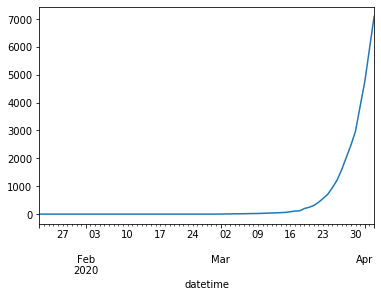

In [98]:
ts.plot()

In [81]:
# df_US = pd.melt(df_ts_us,id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Day', value_name='confirmed')
df_US["Province/State"].value_counts(dropna=False)

NaN    73
Name: Province/State, dtype: int64

## OLDER

In [ ]:
## NEW DATA TO LOAD IN
df_ts_dead = pd.read_csv('time_series_covid_19_deaths.csv')
df_ts_recover = pd.read_csv('time_series_covid_19_recovered.csv')
df_ts_conf = pd.read_csv('time_series_covid_19_confirmed.csv')


df_dict = dict(confirmed =df_ts_conf,dead=df_ts_dead,recovered=df_ts_recover)

for k,_df in df_dict.items():
    _df = pd.melt(_df,id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Day', value_name=k)
    _df['Day']= pd.to_datetime(_df['Day'])
    _df.set_index(['Country/Region','Province/State','Day'],inplace=True)
    df_dict[k] = _df#.drop(columns=['Lat','Long'])

df = pd.concat(list(df_dict.values()),axis=1)
df = df.reset_index().set_index("Day")
df.head()

In [ ]:
# df_dict['confirmed'].columns#.loc['Province/State']

In [ ]:


df.head()

## BOOKMARK (old)

In [ ]:
mpl.rcParams['figure.figsize'] = (12,6)

In [ ]:
def get_country_ts(df, country,group_col='Country/Region',ts_col='Cases'):
    ts = df.groupby(group_col).get_group(country )
    # ts.set_index('date',inplace=True)

    if ts_col is not None:
        return ts[ts_col]
    else:
        return ts

In [ ]:
get_country_ts(df,'US',ts_col=None)[['confirmed','dead','recovered']].plot()

In [ ]:
us = get_country_ts(df,'US',ts_col=None)[['confirmed','dead','recovered']].loc['02-15-20':]
us = us.resample('d').sum()#.cumsum().asfreq('d')

In [ ]:
us.plot()

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()


In [ ]:
ts = pd.concat([us,us.index.to_series(name='Plot Date')],axis=1)
pfig = px.line(ts, x='Plot Date',y='dead')
pfig  # (ts, x='Plot Date',y='confirmed')

In [ ]:
pfig = us.iplot(theme='solar',asFigure=True,title='Coronavirus in the US',
               yTitle='# of Cumulative Cases')
pfig

In [ ]:
us_state = df.groupby('Country/Region').get_group('US')
us_state['Province/State'].value_counts()

# OLDEST CODE BELOW

In [ ]:
df_ts_conf = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
df_ts_conf

In [ ]:
df = pd.melt(df_ts_conf,id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Day', value_name='Cases')
df

In [ ]:
df['date'] = pd.to_datetime(df['Day'])


In [ ]:
sorted(df['Country/Region'].unique())

In [ ]:
TS = {}
for country in df.groupby('Country/Region').groups:
    ts_temp = df.groupby('Country/Region').get_group(country)
    ts_temp.set_index('date',inplace=True)
    TS[country] =ts_temp

In [ ]:
def get_country_ts(df, country,group_col='Country/Region',ts_col='Cases'):
    ts = df.groupby(group_col).get_group(country )
    ts.set_index('date',inplace=True)

    if ts_col is not None:
        return ts[ts_col]
    else:
        return tsx
usa = get_country_ts(df,'US')
usa




In [ ]:

usa.iloc[-10:]

In [ ]:
italy = get_country_ts(df,'Italy')
italy.plot()

In [ ]:
def get_country_cum_ts(df, group='US'):
    US = df.groupby('Country/Region').get_group(group)
    US.set_index('date',inplace=True)
    ts_us = US.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()
    return ts_us

In [ ]:
ts_it = get_country_cum_ts(df,'Italy')
ts_us = get_country_cum_ts(df,'US')
ts_ch = get_country_cum_ts(df,'China')
ts_ko = get_country_cum_ts(df,'Korea, South')
ts_it.plot(label='Italty')
ts_us.plot(label='US')
plt.legend()

In [ ]:
ts_it.head()

In [ ]:

ts_df = pd.concat([ts_us,ts_it,ts_ch,ts_ko],axis=1)
ts_df.plot(subplots=True)

In [ ]:
# US = df.groupby('Country/Region').get_group('US')
# US.set_index('date',inplace=True)
# ts_us = US.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()
# ts_us.plot()

In [ ]:
# IT = df.groupby('Country/Region').get_group('Italy')
# IT.set_index('date',inplace=True)
# ts_it = IT.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()

In [ ]:
# pd.concat

In [ ]:
ts_it.plot(label='Italy')
ts_us.plot(label='US')
# ts_ch.plot(label='China')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
for country in TS:
    TS[country]['Cases'].cumsum().plot(label=country,ax=ax)

ax.legend(bbox_to_anchor=(1.1, 1.05))


# plt.legend()